In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/content/crop-reccomendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


### Exploratory Data Analysis (EDA)

In [3]:
# check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# get data types of each column
print("\nData types:")
print(df.dtypes)

# get descriptive statistics
prgnt("\nDescriptive statistics:")
display(df.describe())

Missing values per column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Data types:
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

Descriptive statistics:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Data Visualization

Visualize the distribution of each numerical feature to understand their ranges and potential skewness.

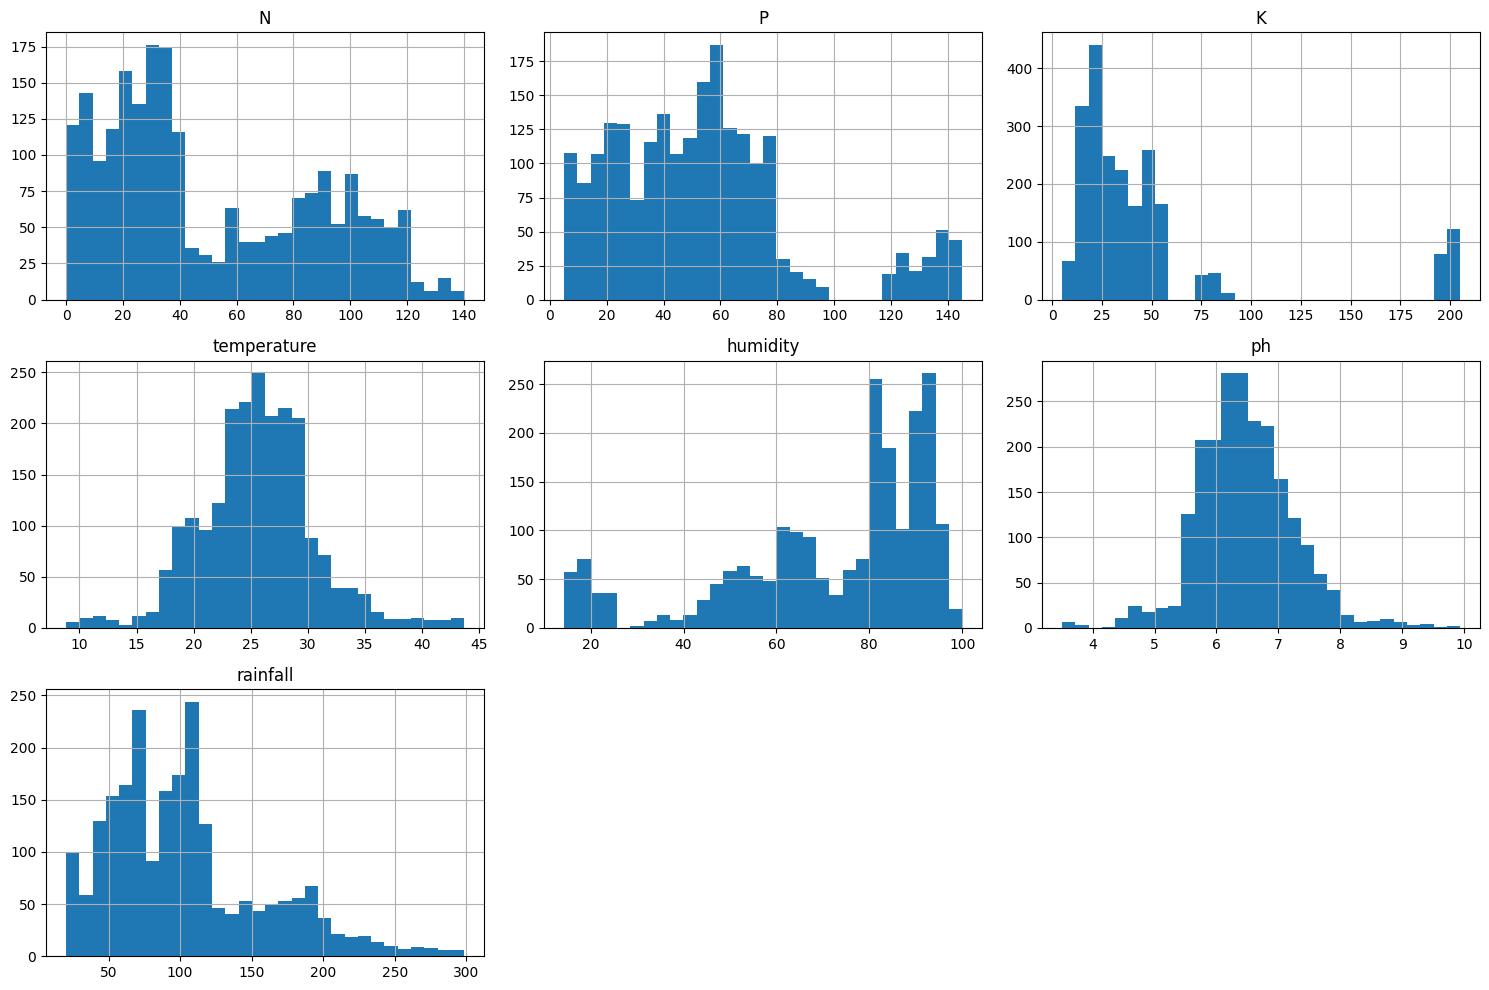

In [4]:
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

### Relationship with Target Variable

visualize the relationship between the numerical features and the target variable ('label') to see how the features vary across different crop types. We can use box plots or violin plots for this.

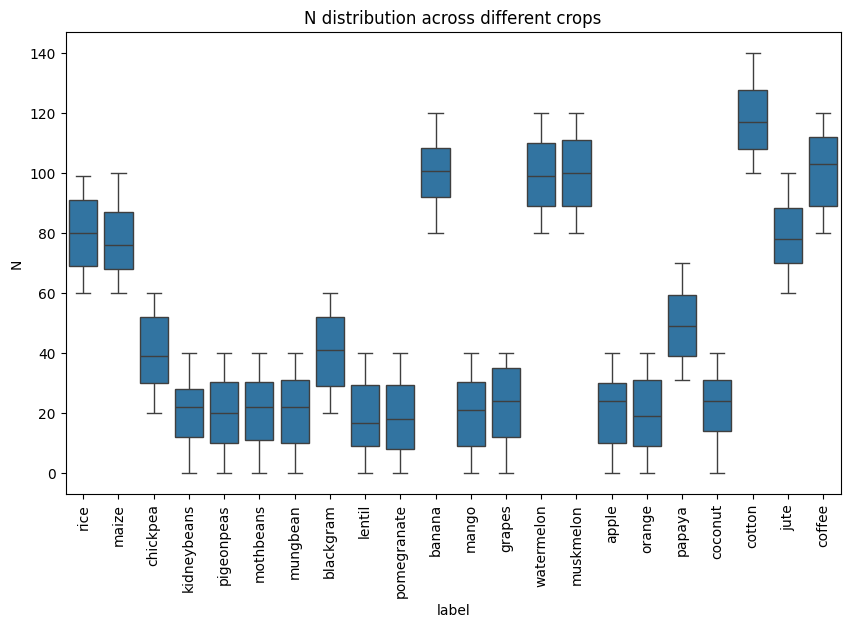

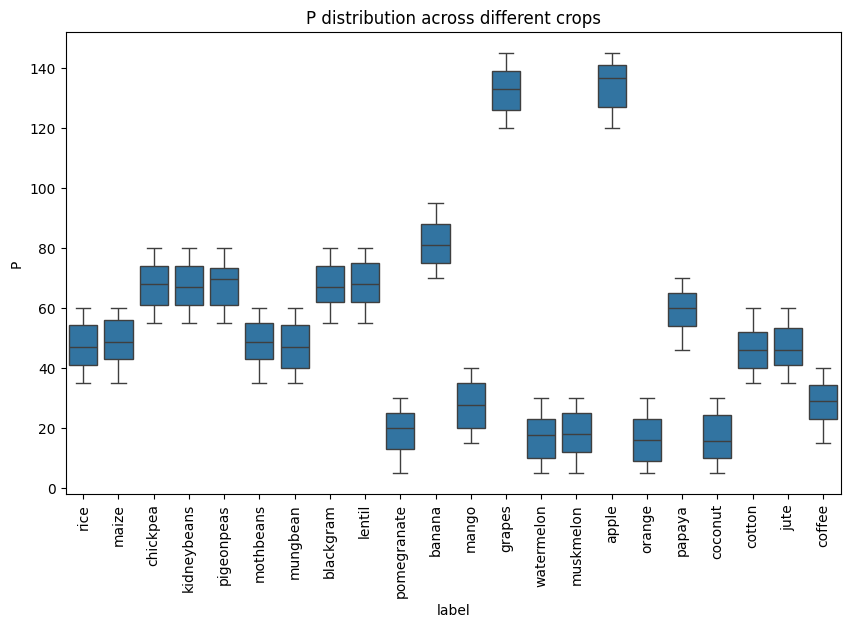

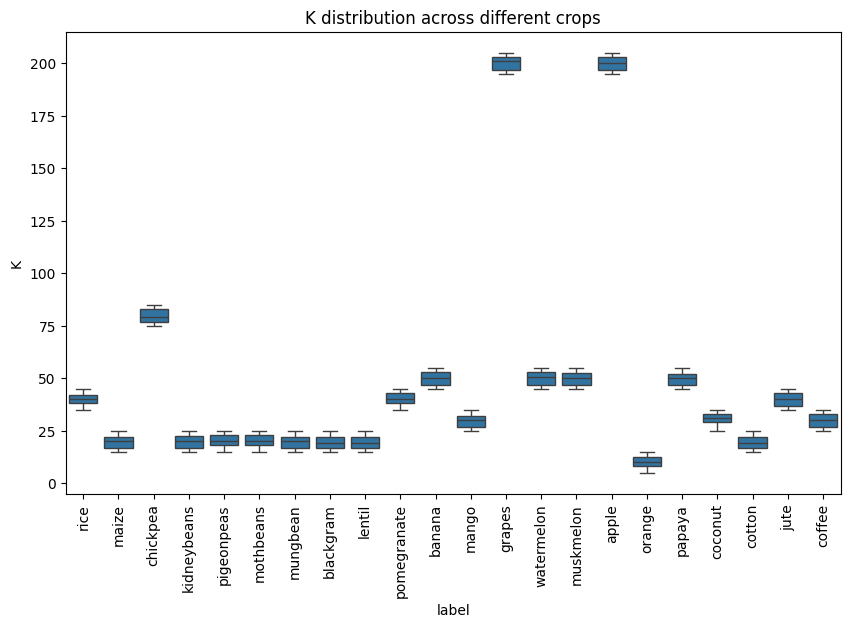

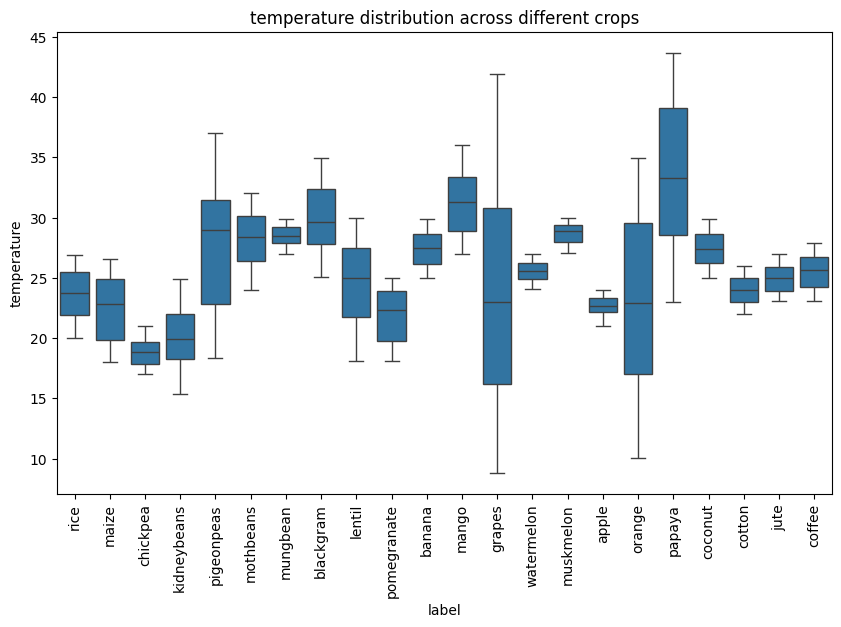

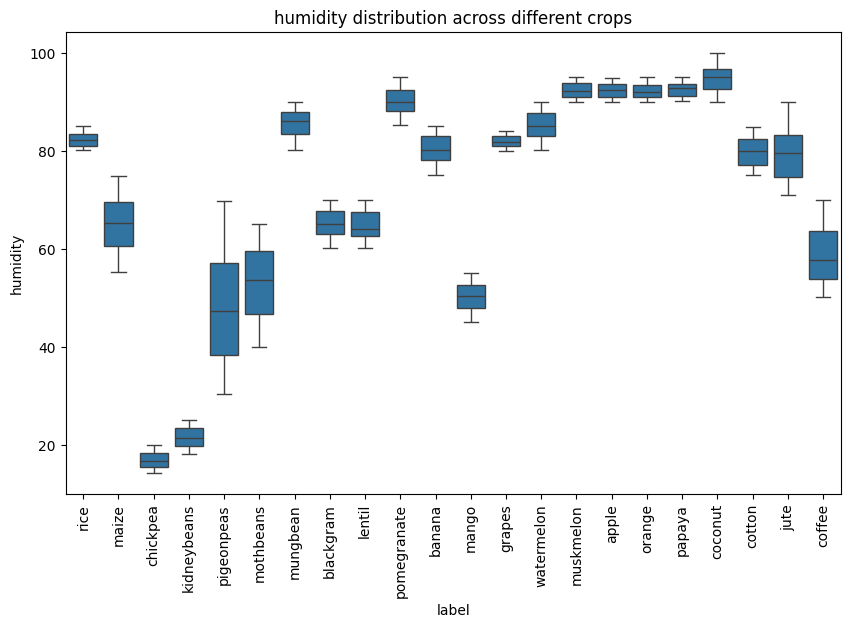

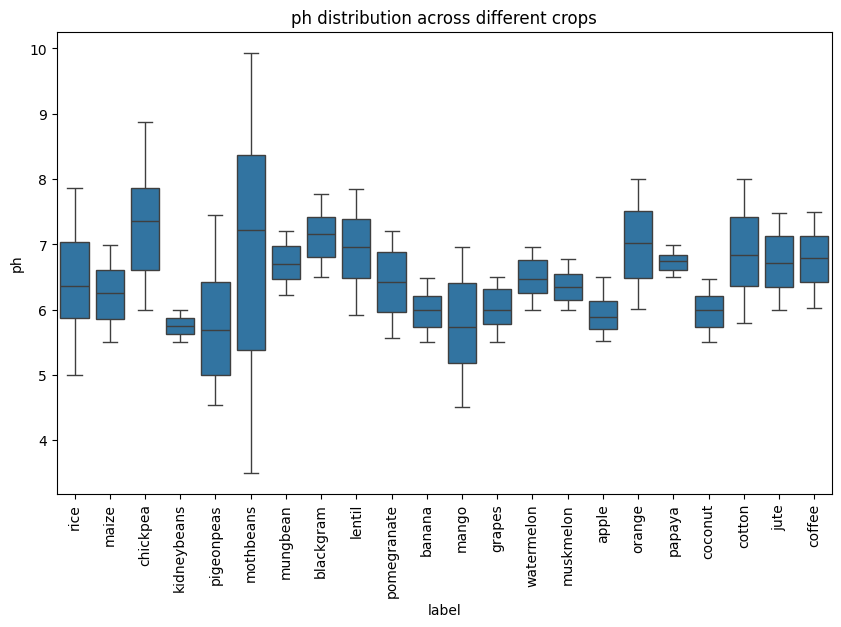

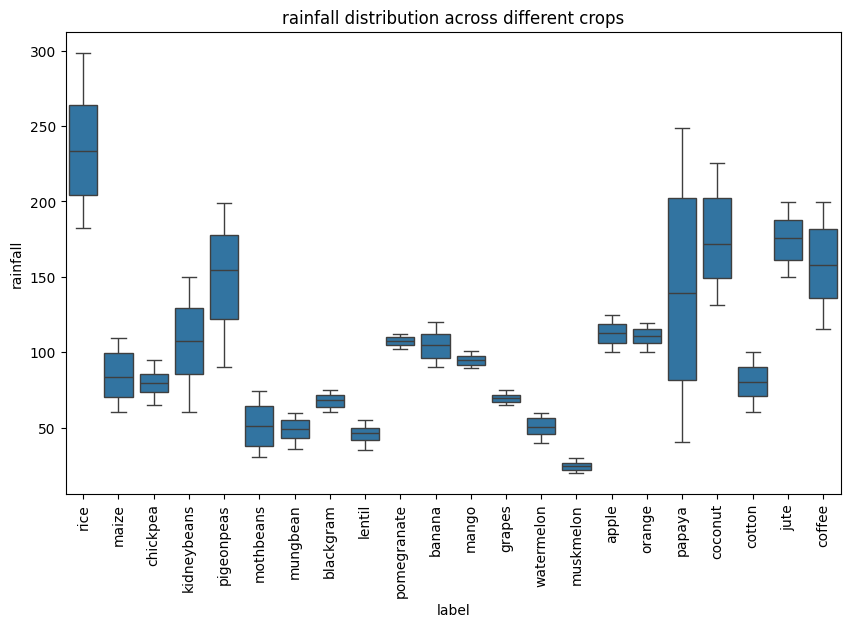

In [5]:
# box plots for each numerical feature against the label
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'{feature} distribution across different crops')
    plt.xticks(rotation=90)
    plt.show()

### Correlation Analysis

Let's examine the correlation between the numerical features. A correlation heatmap can help visualize these relationships.

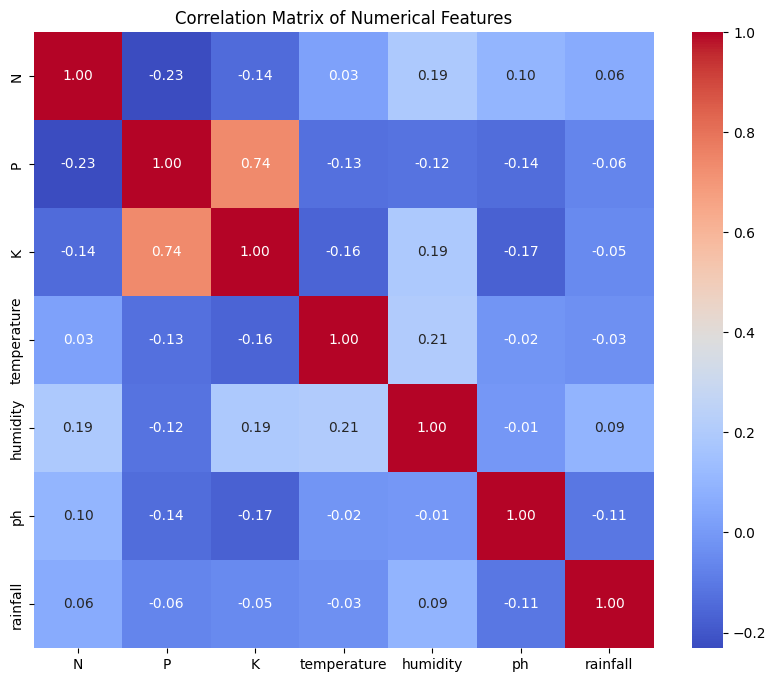

In [6]:
correlation_matrix = df[numerical_features].corr()

# plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Violin Plots

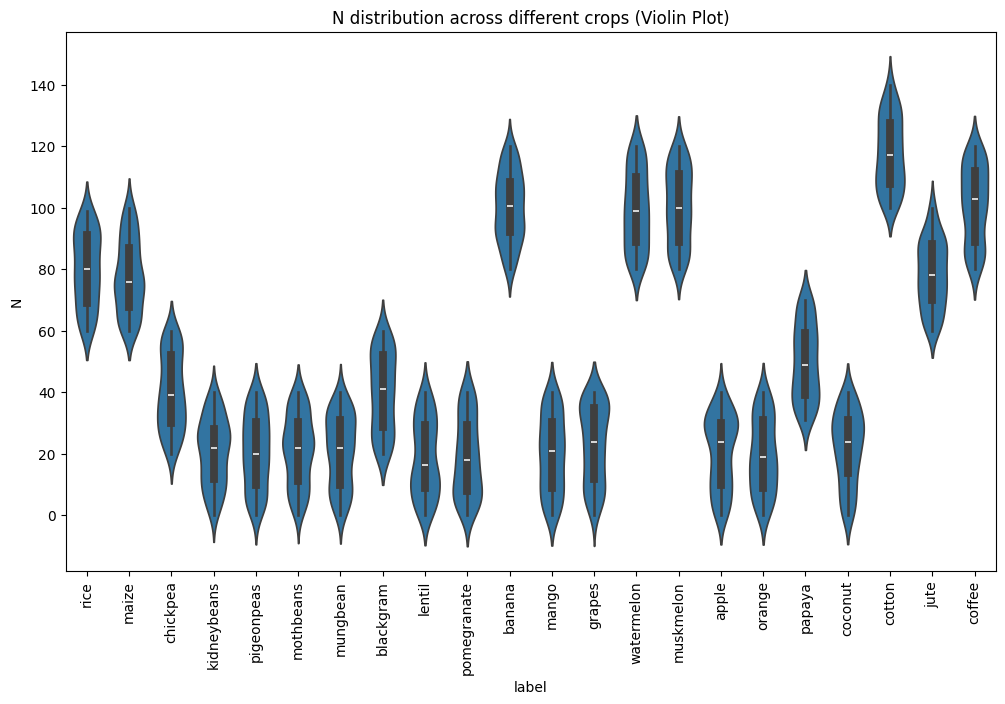

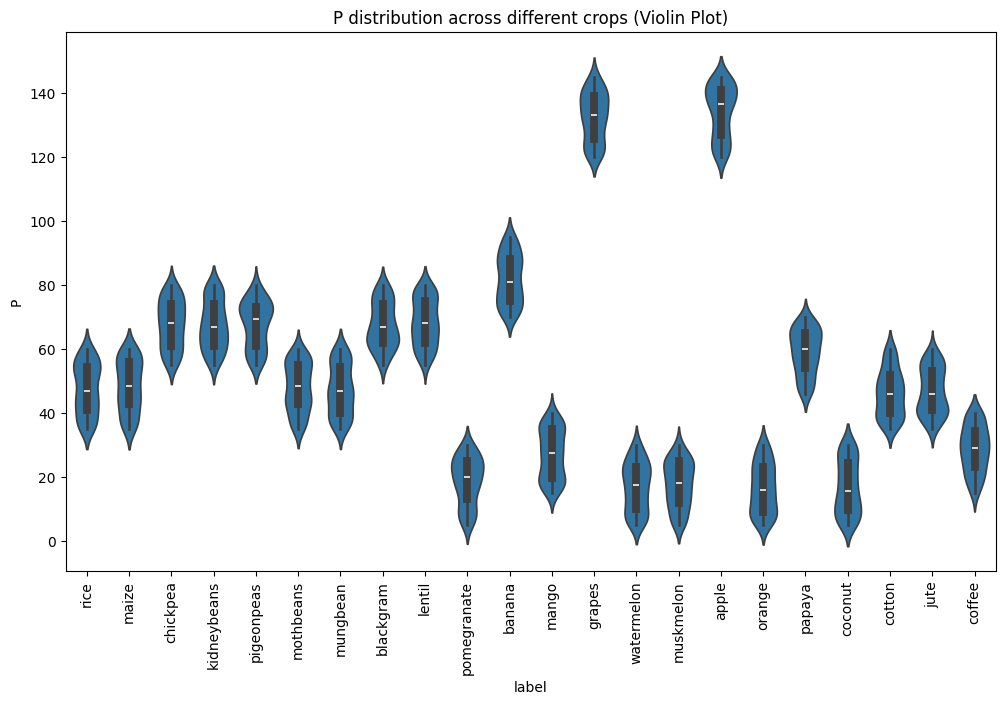

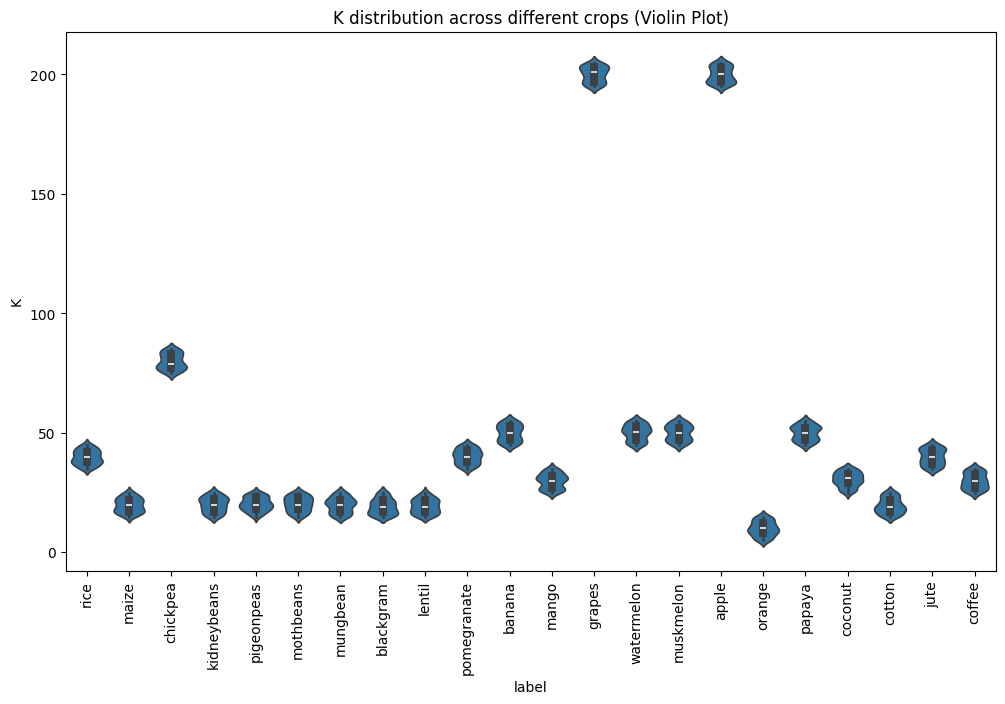

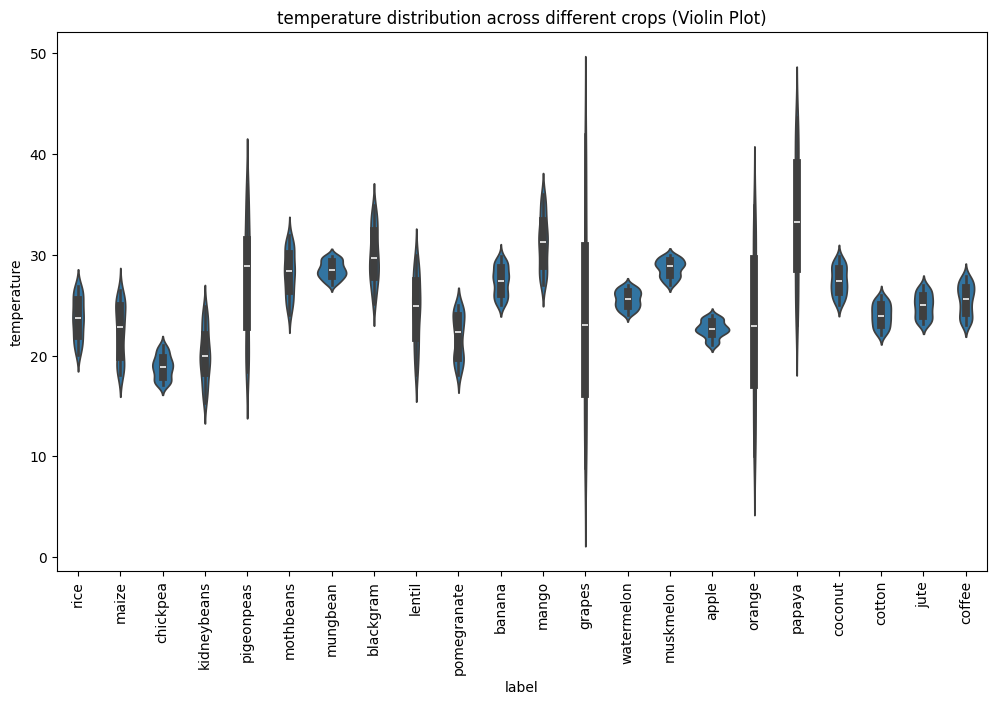

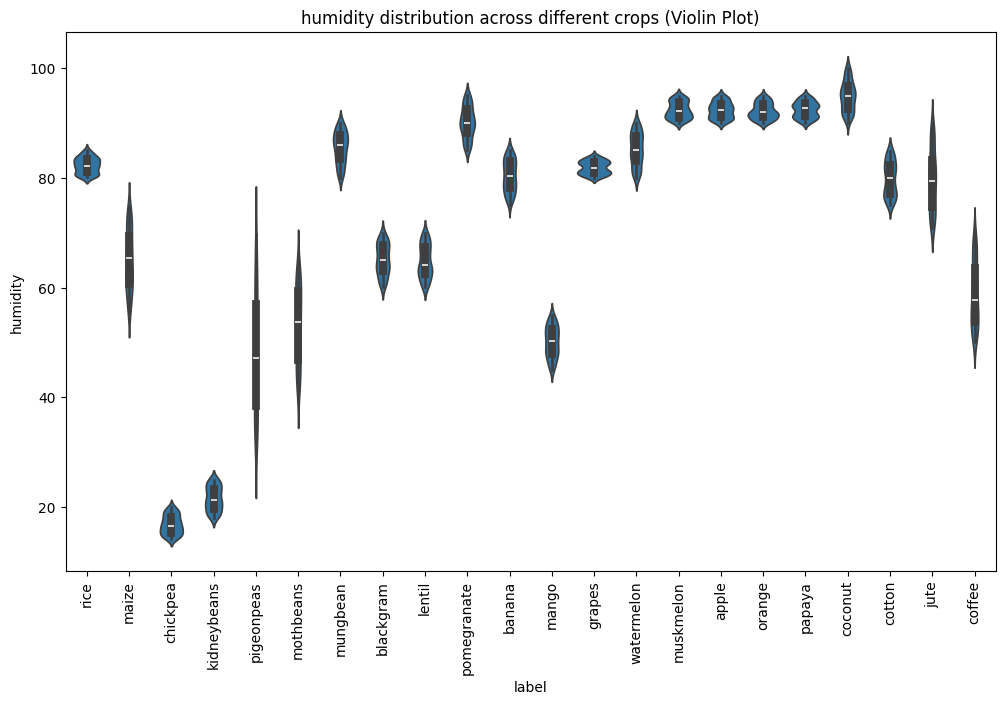

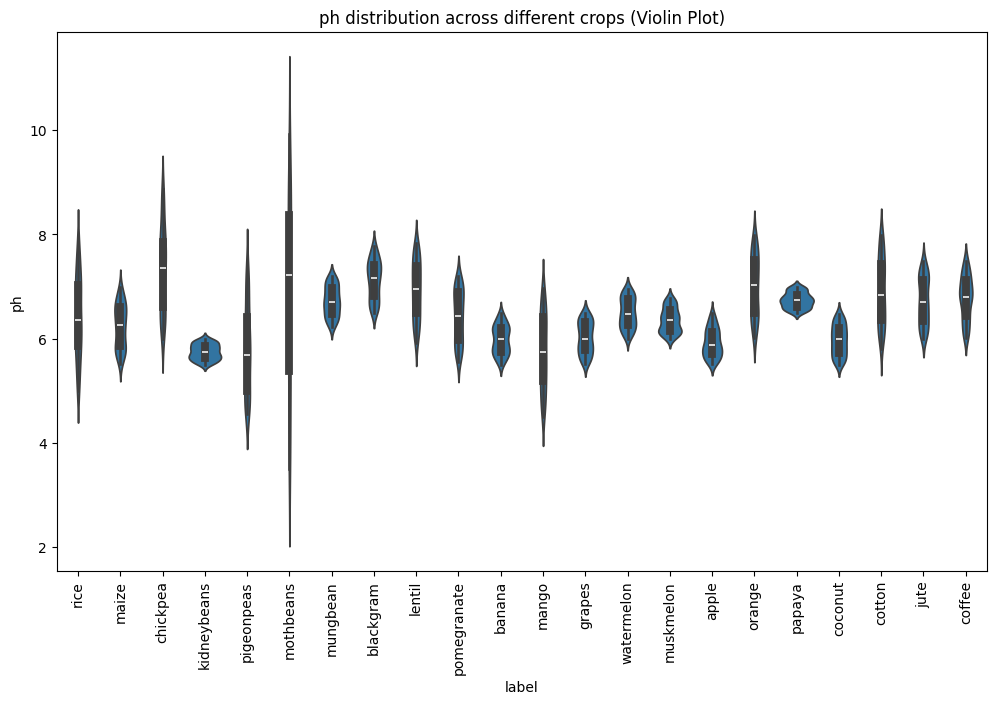

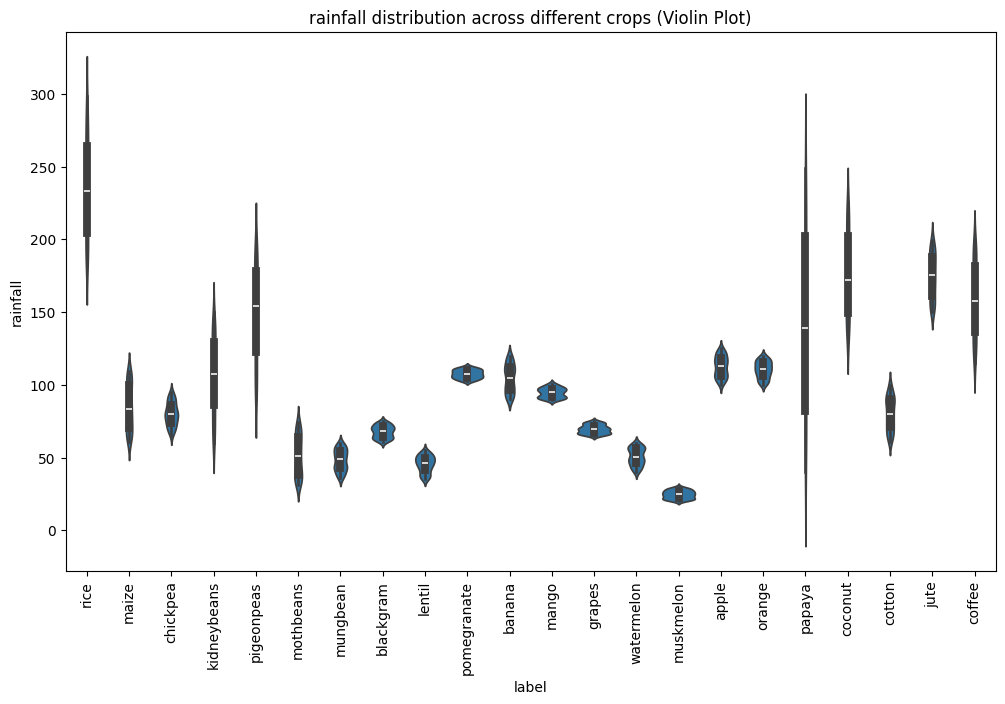

In [8]:
for feature in numerical_features:
    plt.figure(figsize=(12, 7))
    sns.violinplot(x='label', y=feature, data=df)
    plt.title(f'{feature} distribution across different crops (Violin Plot)')
    plt.xticks(rotation=90)
    plt.show()

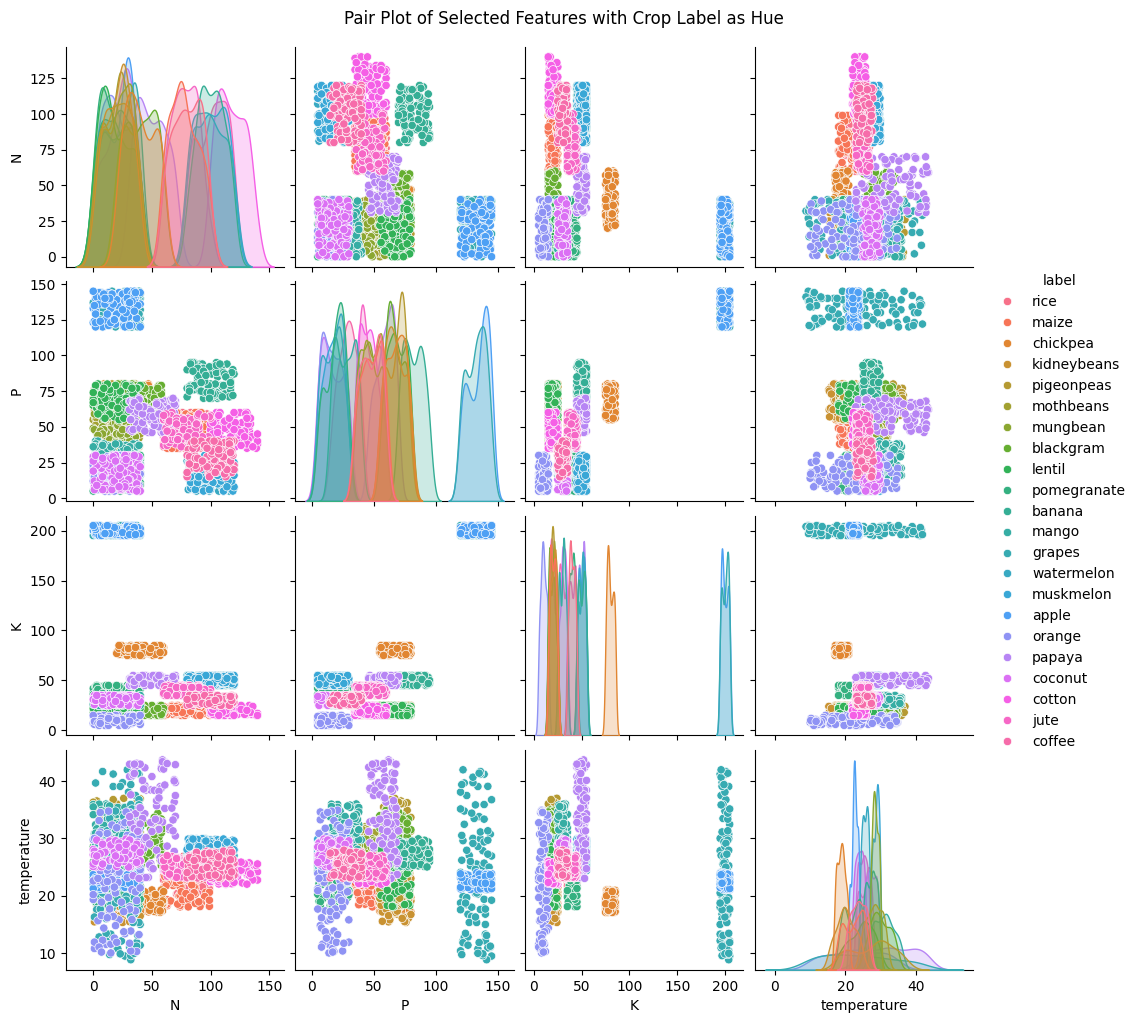

In [9]:
# subset of numerical features for the pair plot for clarity
selected_features = ['N', 'P', 'K', 'temperature']

# pair plot with 'label' as hue
sns.pairplot(df, vars=selected_features, hue='label', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features with Crop Label as Hue', y=1.02)
plt.show()

### Key Findings
*   **Tidak Ada Nilai yang Hilang:** Dataset tidak mengandung nilai yang hilang di kolom mana pun, yang merupakan hal yang baik untuk analisis lebih lanjut.
*   **Tipe Data:** Semua fitur numerik memiliki tipe data yang sesuai (int64 atau float64), dan kolom target 'label' adalah tipe objek (string), yang kemudian kita encode menjadi numerik untuk pemodelan.
*   **Statistik Deskriptif:** Statistik deskriptif memberikan gambaran tentang jangkauan, rata-rata, dan penyebaran setiap fitur numerik. Misalnya, kita melihat variasi yang signifikan dalam nilai N, P, dan K.
*   **Distribusi Fitur Numerik (Histogram dan Violin Plots):**
    *   Histogram menunjukkan bentuk distribusi setiap fitur. Beberapa fitur tampak terdistribusi mendekat normal (misalnya, suhu), sementara yang lain miring (misalnya, curah hujan miring ke kanan).
    *   Violin plots memberikan pandangan yang lebih rinci tentang distribusi fitur numerik di setiap jenis tanaman. Ini menunjukkan kepadatan probabilitas pada nilai yang berbeda dan membantu mengidentifikasi bagaimana distribusi fitur bervariasi antar label.
*   **Hubungan Fitur Numerik dengan Label (Box Plots dan Violin Plots):** Box plots dan violin plots menunjukkan bahwa banyak fitur numerik memiliki distribusi yang berbeda secara signifikan di antara jenis tanaman yang berbeda. Ini menunjukkan bahwa fitur-fitur seperti N, P, K, suhu, kelembaban, pH, dan curah hujan adalah prediktor potensial yang baik untuk jenis tanaman. Misalnya, beberapa tanaman tumbuh subur pada tingkat K yang jauh lebih tinggi daripada yang lain.
*   **Analisis Korelasi (Heatmap):** Heatmap korelasi menunjukkan hubungan linear antar fitur numerik. Ditemukan korelasi positif yang kuat antara Kalium (K) dan Fosfor (P) (0.74), menunjukkan bahwa tingkat kedua nutrisi ini cenderung meningkat atau menurun bersama dalam dataset ini. Korelasi lainnya umumnya lebih lemah.
*   **Pair Plot dengan Label sebagai Hue:** Pair plot dari subset fitur dengan label sebagai warna (hue) menunjukkan bagaimana pasangan fitur berinteraksi dan bagaimana interaksi ini bervariasi untuk setiap jenis tanaman. Kita bisa melihat bahwa titik data untuk label yang berbeda sering kali membentuk cluster yang berbeda dalam plot sebar, lebih lanjut menekankan pentingnya fitur-fitur ini dalam membedakan jenis tanaman.